# Multi linear model

Single shot multi linear model

In [34]:
import time

import pandas as pd
import tensorflow as tf

from window import WindowGenerator
import utils

In [35]:
def train_case(case_df, model, in_width, out_steps, max_epochs):
    """ Train model for given case df. Currently uses 20% of data for validation and 80% for training. """
    
    outlets = [ col for col in case_df.columns.values if col.startswith('outlet') ]
    column_indices = { name: i for i, name in enumerate(case_df.columns) }

    train_df, test_df, val_df = utils.train_test_val_split(case_df, test_size=0, val_size=0.2)
    # train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

    label_columns = outlets

    multi_window = WindowGenerator(
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        input_width=in_width,
        label_width=out_steps,
        shift=out_steps,
        label_columns=label_columns
    )

    history = model.fit(
        multi_window.train,
        epochs=max_epochs,
        validation_data=multi_window.val,
        verbose=0
        # callbacks=[early_stopping]
    )

    return multi_window, history

## Dataset

In [36]:
case_1 = pd.read_csv("../datasets/case_1.csv", index_col='Time')
case_2 = pd.read_csv("../datasets/case_2.csv", index_col='Time')
case_3 = pd.read_csv("../datasets/case_3.csv", index_col='Time')
case_4 = pd.read_csv("../datasets/case_4.csv", index_col='Time')
case_5 = pd.read_csv("../datasets/case_5.csv", index_col='Time')

In [37]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets

In [38]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

## Model creation

In [39]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 20
features_size = len(label_columns)

print(f"Using {IN_WIDTH*5}s of data to predict {OUT_STEPS*5}s into de future.")
print(f"Using {IN_WIDTH*5/60}min of data to predict {OUT_STEPS*5/60}min into de future.")

Using 90s of data to predict 90s into de future.
Using 1.5min of data to predict 1.5min into de future.


In [40]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(10, activation='relu'), # 512
    # Dropout
    # tf.keras.layers.Dropout(rate=0.5),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*features_size,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, features_size])
])

In [41]:
multi_linear_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [42]:
exec_times = {}

In [43]:
results = {}

## Case 2

In [44]:
start_t = time.time()

window, history = train_case(case_2, multi_linear_model, IN_WIDTH, OUT_STEPS, MAX_EPOCHS)

exec_times['case_2'] = time.time() - start_t

2022-10-02 20:31:25.233865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-02 20:31:25.636966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [45]:
multi_linear_model.build(input_shape=window.example[0].shape)
multi_linear_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 272)            0         
                                                                 
 dense_2 (Dense)             (None, 1, 10)             2730      
                                                                 
 dense_3 (Dense)             (None, 1, 2448)           26928     
                                                                 
 reshape_1 (Reshape)         (None, 18, 136)           0         
                                                                 
Total params: 29,658
Trainable params: 29,658
Non-trainable params: 0
_________________________________________________________________


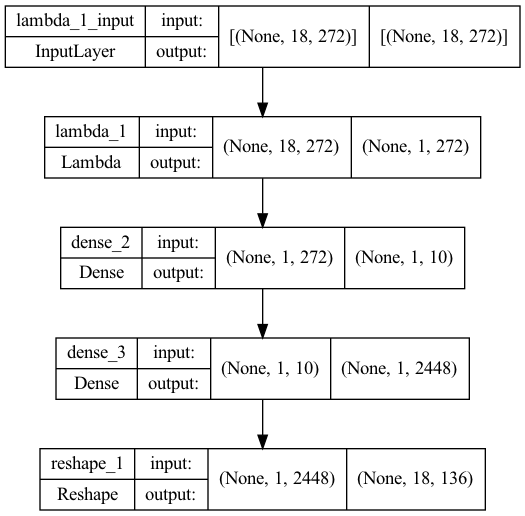

In [46]:
tf.keras.utils.plot_model(multi_linear_model, "../plots/models/multi_lineal.png", show_shapes=True)

label_col_index 135
label_col_index 135
label_col_index 135


2022-10-02 20:31:33.868671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


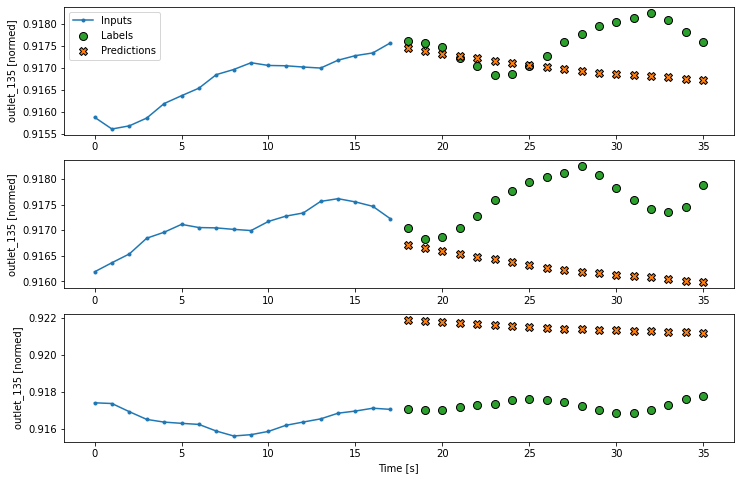

In [47]:
window.plot(multi_linear_model, plot_col="outlet_135")

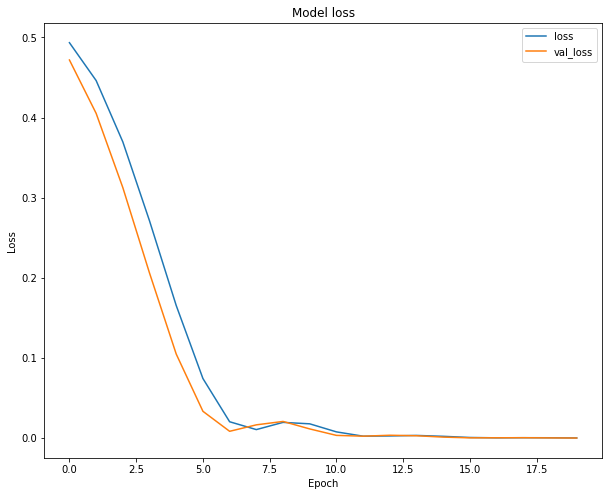

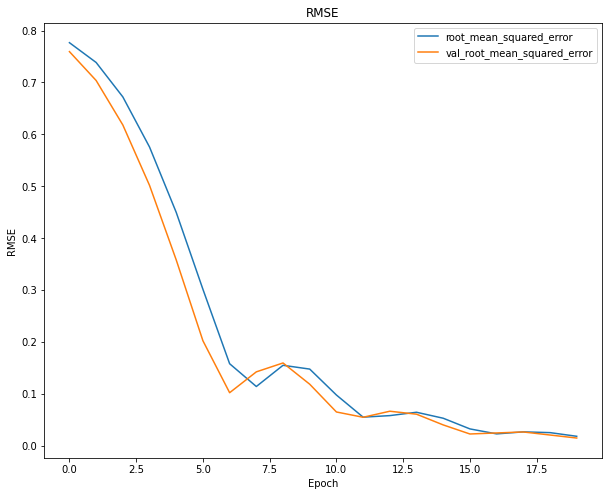

In [48]:
utils.plot_losses(history=history)

In [49]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [50]:
start_t = time.time()

window, history = train_case(case_3, multi_linear_model, IN_WIDTH, OUT_STEPS, MAX_EPOCHS)

exec_times['case_3'] = time.time() - start_t

label_col_index 135
label_col_index 135
label_col_index 135


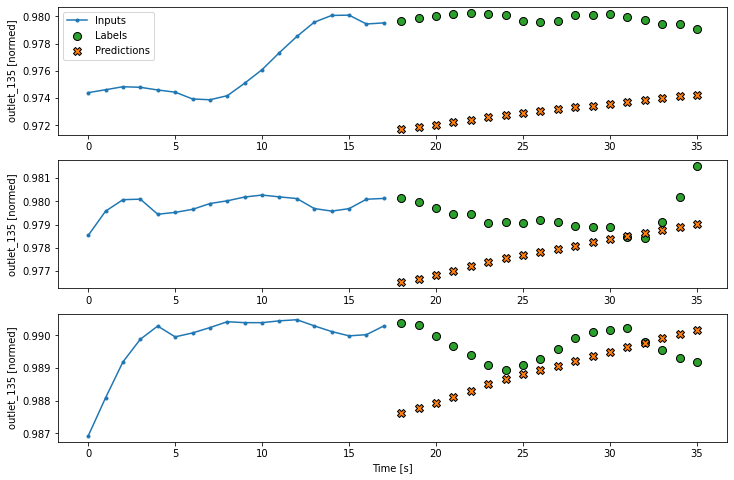

In [51]:
window.plot(multi_linear_model, plot_col="outlet_135")

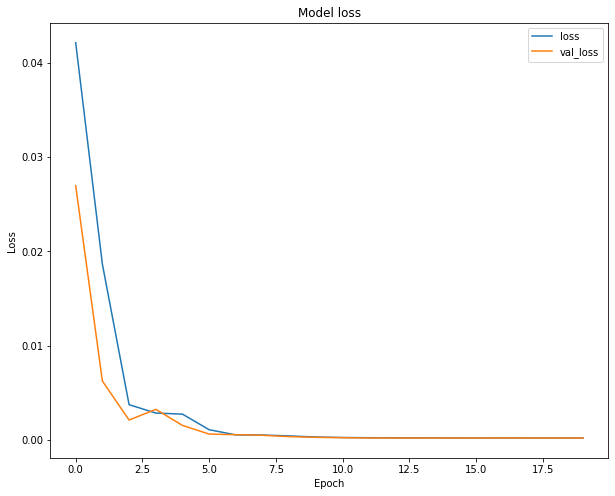

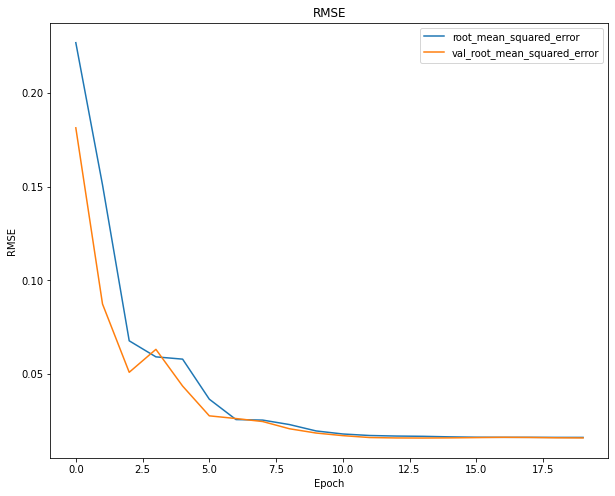

In [52]:
utils.plot_losses(history=history)

In [53]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [54]:
start_t = time.time()

window, history = train_case(case_4, multi_linear_model, IN_WIDTH, OUT_STEPS, MAX_EPOCHS)

exec_times['case_4'] = time.time() - start_t

label_col_index 135
label_col_index 135
label_col_index 135


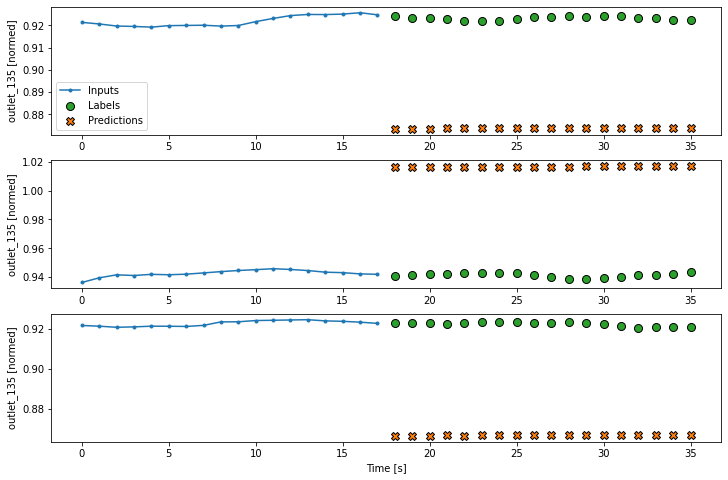

In [55]:
window.plot(multi_linear_model, plot_col="outlet_135")

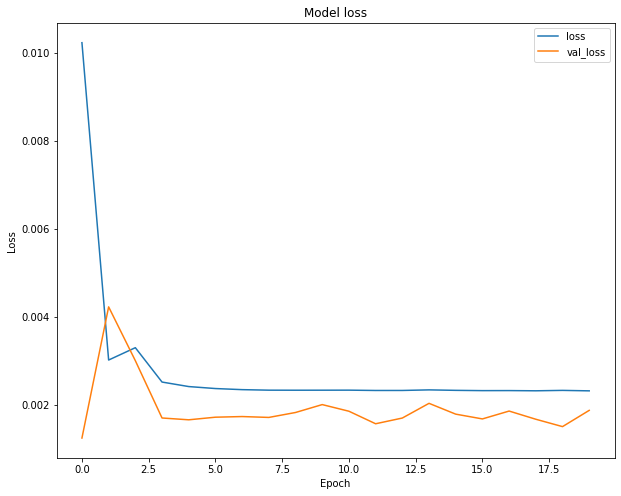

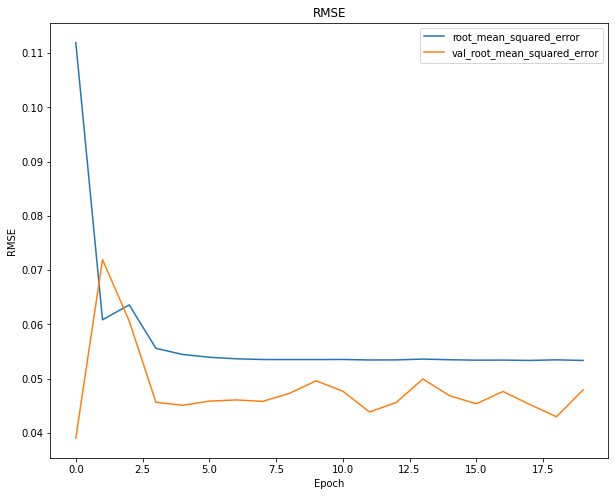

In [56]:
utils.plot_losses(history=history)

In [57]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [58]:
start_t = time.time()

window, history = train_case(
    case_df=case_5,
    model=multi_linear_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_5'] = time.time() - start_t

label_col_index 135
label_col_index 135
label_col_index 135


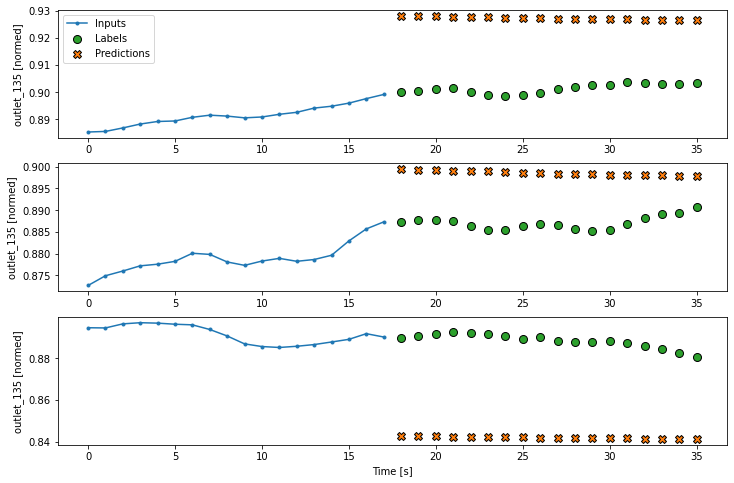

In [59]:
window.plot(multi_linear_model, plot_col="outlet_135")

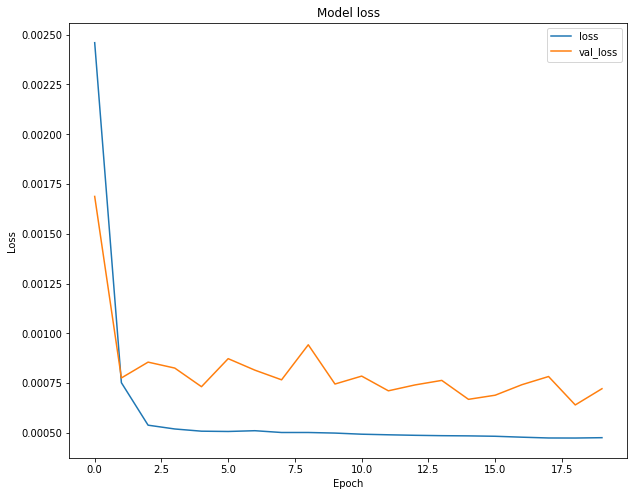

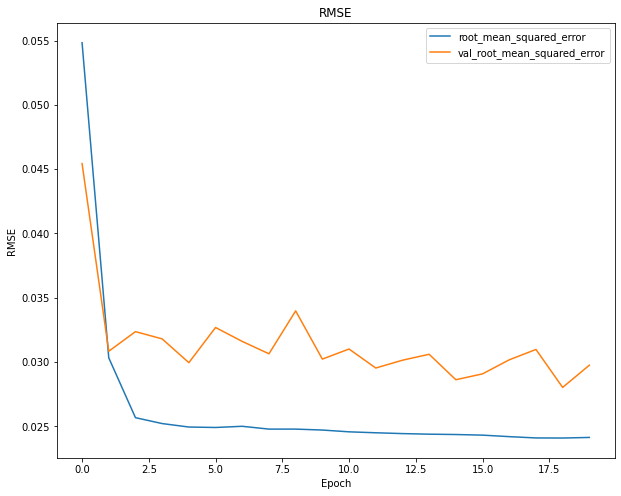

In [60]:
utils.plot_losses(history=history)

In [61]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [62]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
column_indices = { name: i for i, name in enumerate(case_1.columns) }

In [63]:
window = WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=outlets
)

test_results = multi_linear_model.evaluate(window.train)

5/5 [==============================] - 0s 13ms/step - loss: 0.0225 - root_mean_squared_error: 0.1658


In [64]:
results['test'] = {
    'loss': test_results[0],
    'rmse': test_results[1]
}

In [65]:
pd.DataFrame(results).transpose()

,loss,rmse,val_loss,val_rmse
case_2,0.000281,0.018541,0.000188,0.015178
case_3,0.000210,0.016012,0.000206,0.015742
case_4,0.002319,0.053366,0.001876,0.047950
case_5,0.000476,0.024134,0.000722,0.029752
test,0.022486,0.165786,NaN,NaN


In [66]:
exec_times = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time'])
exec_times

,Time
case_2,8.915419
case_3,8.832693
case_4,9.427512
case_5,11.050288


In [67]:
print("Total: ", exec_times['Time'].sum())

Total:  38.22591209411621
